# Laborator 1

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
img = cv.imread("C:\\Users\\Bogdan\\Desktop\\Laborator1\\Laborator1\\butterfly.jpeg",cv.IMREAD_GRAYSCALE)
cv.imshow("Fluture galben",img)
cv.waitKey(0)
cv.destroyAllWindows()
H, W = img.shape
print(H,W)

670 626


In [12]:
img = cv.resize(cv.cvtColor(cv.imread("C:\\Users\\Bogdan\\Desktop\\Laborator1\\Laborator1\\football.jpg"), cv.COLOR_BGR2GRAY),(100, 100))
#img = cv.imread("C:\\Users\\Bogdan\\Desktop\\Laborator1\\Laborator1\\football.jpg")
print(img.dtype)
print(img.shape)
cv.imshow("Football",img)
cv.waitKey(0)
cv.destroyAllWindows()
H, W = img.shape

uint8
(100, 100)


[ 19  19  20 ... 254 254 254]


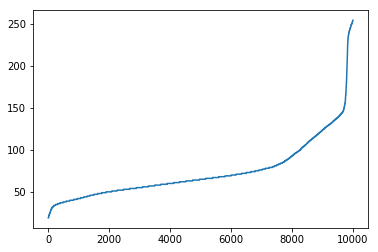

In [11]:
#a
x = np.sort(img.flatten())
print(x)
plt.plot(np.arange(len(x)),x)
plt.show()

In [13]:
#b
A = img[50:,50:].copy()
cv.imshow("Subimagine dreapta jos",A)
cv.waitKey(0)
cv.destroyAllWindows()

In [14]:
#c
t = np.median(x)
print(t)

65.0


In [16]:
#d
B = img.copy()
B[B<t] = 0
B[B >=t] = 255
cv.imshow("B",B)
cv.waitKey(0)
cv.destroyAllWindows()

In [23]:
#e
intensitate_medie = img.mean()
#print(intensitate_medie)
print(img.dtype)
print(intensitate_medie.dtype)
C = (img - intensitate_medie)
C[C<0] = 0
C = np.uint8(C)
print(C.min())
print(C.max())
print(C.dtype)
cv.imshow("C",C)
cv.waitKey(0)
cv.destroyAllWindows()

uint8
float64
0
179
uint8


In [28]:
intensitate_minima = img.min()
linie,coloana = np.where(img == intensitate_minima)
print(linie, coloana)
print(img[76][68])
print(img[88][50])

[76 88] [68 50]
19
19


# Imaginea medie a unei colectii de imagini

In [29]:
import os

In [38]:
dir_path = "C:\\Users\\Bogdan\\Desktop\\Laborator1\\Laborator1\\colectiiImagini\\colectiiImagini\\set2\\"
filenames = os.listdir(dir_path)
#print(filenames)
#print(len(filenames))
color_images = []
gray_images = []
for image_name in filenames:
    img_current = cv.imread(dir_path + image_name)
    color_images.append(img_current)
    gray_images.append(cv.cvtColor(img_current,cv.COLOR_BGR2GRAY))
    #cv.imshow("img curenta",img_current)
    #cv.waitKey(500)
    #cv.destroyAllWindows()
color_images = np.array(color_images)
gray_images = np.array(gray_images)

mean_color_image = np.uint8(np.mean(color_images,axis=0))
print(gray_images.shape)
mean_gray_image = np.uint8(np.mean(gray_images,axis=0))
print(mean_color_image.shape)

X = np.uint8(np.std(gray_images,axis=0))
cv.imshow("imagine medie color",mean_color_image)
cv.waitKey(0)
print(mean_gray_image.shape)
cv.imshow("imagine medie gri",mean_gray_image)
cv.waitKey(0)

cv.imshow("deviatia standard",X)
cv.waitKey(0)


cv.destroyAllWindows()

(100, 164, 398)
(164, 398, 3)
(164, 398)


# Modificarea unei imagini

In [39]:
img = cv.imread("C:\\Users\\Bogdan\\Desktop\\Laborator1\\Laborator1\\butterfly.jpeg")
print(img.shape)

(670, 626, 3)


In [48]:
window_size = 20
img_crop = img[250:250+window_size,250:250+window_size,:].copy()
cv.imshow("Img crop", img_crop)
cv.waitKey(0)
cv.destroyAllWindows()
print(img_crop.shape)

(20, 20, 3)


In [92]:
nb_windows = 150000
H,W,c = img.shape
#coltul din stanga sus e parametrizat de (y,x)
y = np.random.randint(0,H-window_size+1,size=(nb_windows,))
x = np.random.randint(0,W-window_size+1,size=(nb_windows,))

In [93]:
distances = np.zeros(nb_windows)
for i in range(nb_windows):
    img_window = img[y[i]:y[i]+window_size,x[i]:x[i]+window_size,:].copy()
    # distanta l2
    distances[i] = np.sqrt(np.sum((np.float64(img_window) - np.float64(img_crop))**2))
    
idx = np.argmin(distances)
print(distances.min())
print(distances[idx])
img_reconstruita = img.copy()
img_reconstruita[250:250+window_size,250:250+window_size,:] = img[y[idx]:y[idx]+window_size,x[idx]:x[idx]+window_size,:].copy()
cv.imshow("Imaginea reconstruita",img_reconstruita)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite("C:\\Users\\Bogdan\\Desktop\\Laborator1\\Laborator1\\butterfly_reconstruit.jpeg",img_reconstruita)

584.0710573209393
584.0710573209393


True